,sale_id,customer_id,product_id,date,quantity,name,region_id,product_name,price,region_name,total_sale
0,1,1,101,2023-10-01,2,Олександр,1,Продукт A,150,Київ,300
1,2,2,102,2023-10-02,1,Марія,2,Продукт B,200,Львів,200
2,3,1,101,2023-10-03,3,Олександр,1,Продукт A,150,Київ,450
3,4,3,103,2023-10-04,1,Іван,1,Продукт C,300,Київ,300
4,5,2,102,2023-10-05,2,Марія,2,Продукт B,200,Львів,400
5,6,3,103,2023-10-06,4,Іван,1,Продукт C,300,Київ,1200


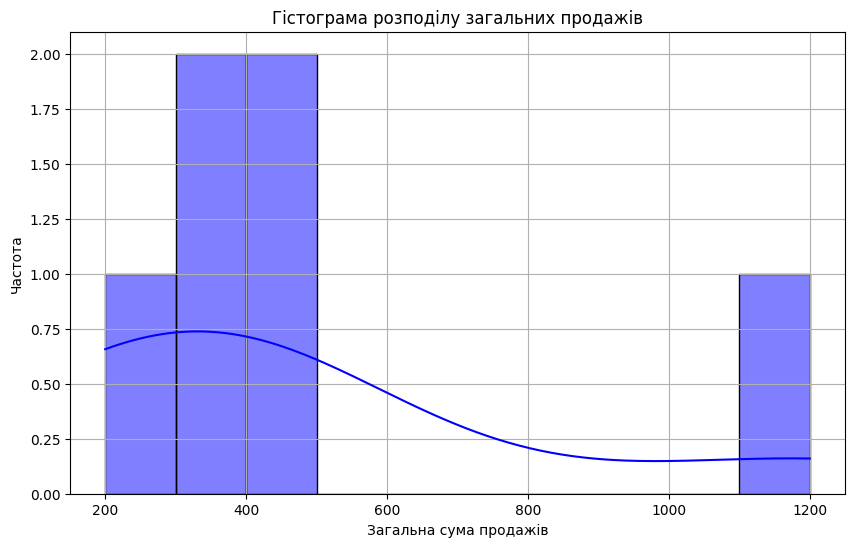

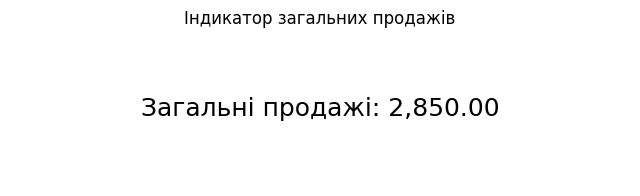

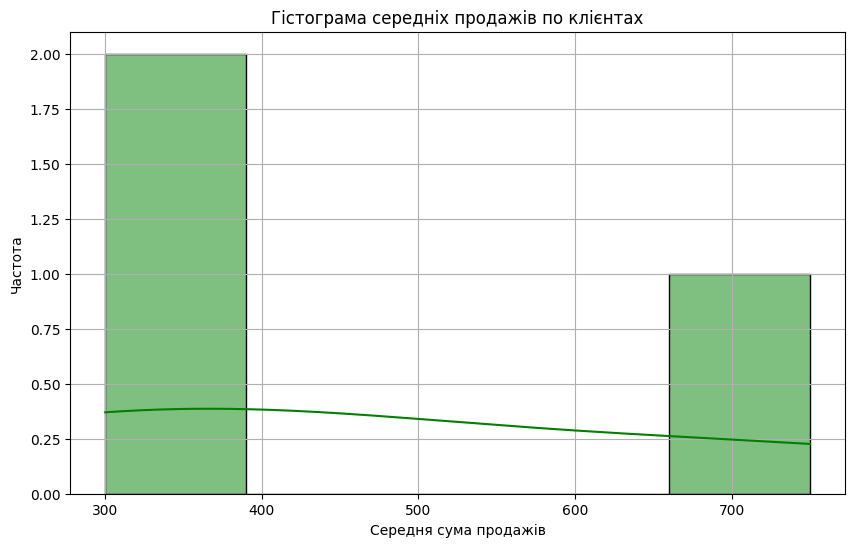

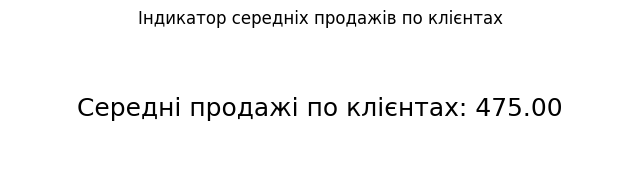

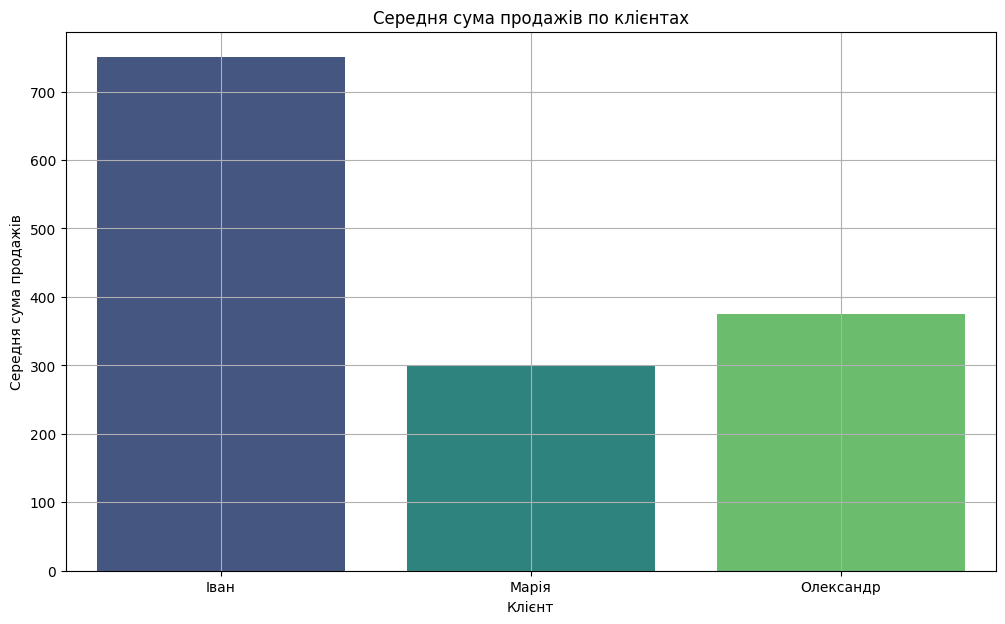

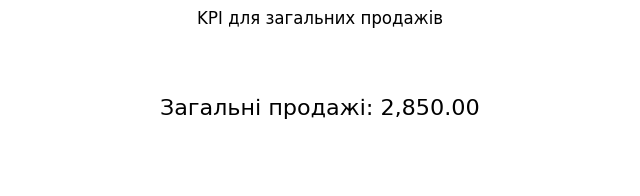

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import ipywidgets as widgets
from IPython.display import display

# Створення даних для таблиць

# Таблиця клієнтів
customers_data = {
    'customer_id': [1, 2, 3],
    'name': ['Олександр', 'Марія', 'Іван'],
    'region_id': [1, 2, 1]
}
customers = pd.DataFrame(customers_data)

# Таблиця продуктів
products_data = {
    'product_id': [101, 102, 103],
    'product_name': ['Продукт A', 'Продукт B', 'Продукт C'],
    'price': [150, 200, 300]
}
products = pd.DataFrame(products_data)

# Таблиця регіонів
regions_data = {
    'region_id': [1, 2],
    'region_name': ['Київ', 'Львів']
}
regions = pd.DataFrame(regions_data)

# Таблиця продажів із датами
sales_data = {
    'sale_id': [1, 2, 3, 4, 5, 6],
    'customer_id': [1, 2, 1, 3, 2, 3],
    'product_id': [101, 102, 101, 103, 102, 103],
    'date': ['2023-10-01', '2023-10-02', '2023-10-03', '2023-10-04', '2023-10-05', '2023-10-06'],
    'quantity': [2, 1, 3, 1, 2, 4]
}
sales = pd.DataFrame(sales_data)
sales['date'] = pd.to_datetime(sales['date'])  # Перетворення дати

# Злиття таблиць
full_data = pd.merge(sales, customers, on='customer_id', how='left')
full_data = pd.merge(full_data, products, on='product_id', how='left')
full_data = pd.merge(full_data, regions, on='region_id', how='left')
full_data['total_sale'] = full_data['price'] * full_data['quantity']

# Функція для створення міри загальних продажів
def total_sales(data):
    """Міра загальних продажів за всіма клієнтами."""
    return data['total_sale'].sum()

# Функція для створення міри середніх продажів по клієнтах
def average_sales_per_customer(data):
    """Міра середніх продажів по клієнтах."""
    return data.groupby('name')['total_sale'].mean()

# Додаткові показники
# КПІ загальних продажів
kpi_sales = total_sales(full_data)
# Середнє значення продажів по всіх клієнтах
kpi_avg_sales = average_sales_per_customer(full_data).mean()

# Створення індикатора загальних продажів
def create_indicator(value, label):
    """Створення індикатора з значенням та лейблом."""
    return f"{label}: {value:,.2f}"

indicator_sales = create_indicator(kpi_sales, "Загальні продажі")
indicator_avg_sales = create_indicator(kpi_avg_sales, "Середні продажі по клієнтах")

# Створення віджетів для вибору дати
start_date_widget = widgets.DatePicker(description='Дата початку', value=pd.to_datetime('2023-10-01'))
end_date_widget = widgets.DatePicker(description='Дата кінця', value=pd.to_datetime('2023-10-06'))

# Функція для фільтрації даних за вибраними датами
def filter_data_by_date(start_date, end_date):
    filtered_data = full_data[(full_data['date'] >= start_date) & (full_data['date'] <= end_date)]
    display(filtered_data)

# Виведення інтерактивних віджетів для вибору дат
widgets.interactive(filter_data_by_date, start_date=start_date_widget, end_date=end_date_widget)

# Оновлений функціонал візуалізацій

# Візуалізація 1: Гістограма розподілу загальних продажів
plt.figure(figsize=(10, 6))
sns.histplot(full_data['total_sale'], kde=True, color='blue', bins=10)
plt.title('Гістограма розподілу загальних продажів')
plt.xlabel('Загальна сума продажів')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

# Візуалізація 2: Індикатор загальних продажів
fig, ax = plt.subplots(figsize=(8, 2))
ax.text(0.5, 0.5, indicator_sales, fontsize=18, ha='center', va='center')
ax.axis('off')
plt.title('Індикатор загальних продажів')
plt.show()

# Візуалізація 3: Гістограма середніх продажів по клієнтах
plt.figure(figsize=(10, 6))
sns.histplot(average_sales_per_customer(full_data), kde=True, color='green', bins=5)
plt.title('Гістограма середніх продажів по клієнтах')
plt.xlabel('Середня сума продажів')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

# Візуалізація 4: Індикатор середніх продажів по клієнтах
fig, ax = plt.subplots(figsize=(8, 2))
ax.text(0.5, 0.5, indicator_avg_sales, fontsize=18, ha='center', va='center')
ax.axis('off')
plt.title('Індикатор середніх продажів по клієнтах')
plt.show()

# Візуалізація 5: KPI для кожного клієнта
plt.figure(figsize=(12, 7))
sns.barplot(data=average_sales_per_customer(full_data).reset_index(), x='name', y='total_sale', hue='name', palette='viridis', dodge=False, legend=False)
plt.title('Середня сума продажів по клієнтах')
plt.xlabel('Клієнт')
plt.ylabel('Середня сума продажів')
plt.grid(True)
plt.show()

# Візуалізація 6: KPI для загальних продажів
plt.figure(figsize=(8, 2))
plt.text(0.5, 0.5, f"Загальні продажі: {total_sales(full_data):,.2f}", fontsize=16, ha='center', va='center')
plt.axis('off')
plt.title('KPI для загальних продажів')
plt.show()